In [1]:
# for loading/processing the images  
import tensorflow as tf

from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from tensorflow.keras.applications import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle



*   Je vais  utiliser un dataset aribtraire, exemple : Flower dataset dans Kaggle après on change ça avec notre propore dataset 

*   Ajout de pooling pour réduire la dimension 
*   Utilisation d'un VGG au lieu d'un Resnet 










In [2]:
model = VGG16(include_top=True,weights='imagenet',input_shape=(224,224,3),pooling='max')

553476096/553467096 [==============================] - 17s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls

drive  sample_data


In [7]:
base_dir = "/content/drive/My Drive/flowers"

In [8]:
flowers = []

with os.scandir(base_dir) as files:
    for file in files:
        if file.name.endswith('.png'):
            flowers.append(file.name)

In [9]:
flowers

['02_010.png',
 '01_029.png',
 '01_008.png',
 '00_041.png',
 '01_036.png',
 '00_013.png',
 '01_034.png',
 '01_044.png',
 '01_009.png',
 '00_044.png',
 '01_018.png',
 '01_042.png',
 '01_003.png',
 '00_007.png',
 '01_001.png',
 '02_009.png',
 '01_002.png',
 '01_033.png',
 '01_032.png',
 '01_025.png',
 '00_016.png',
 '02_024.png',
 '02_025.png',
 '00_011.png',
 '02_017.png',
 '02_016.png',
 '01_017.png',
 '01_011.png',
 '01_035.png',
 '02_019.png',
 '00_018.png',
 '01_006.png',
 '00_023.png',
 '01_012.png',
 '00_038.png',
 '01_043.png',
 '00_026.png',
 '02_022.png',
 '02_020.png',
 '02_036.png',
 '00_012.png',
 '02_015.png',
 '00_024.png',
 '01_024.png',
 '01_013.png',
 '02_032.png',
 '00_006.png',
 '01_039.png',
 '02_013.png',
 '00_037.png',
 '02_014.png',
 '00_005.png',
 '02_005.png',
 '01_027.png',
 '00_010.png',
 '00_031.png',
 '00_009.png',
 '01_038.png',
 '00_014.png',
 '01_040.png',
 '02_003.png',
 '00_028.png',
 '02_034.png',
 '00_043.png',
 '00_004.png',
 '01_007.png',
 '01_041.p

# Data Preprocessing

In [10]:
import os
os.chdir(base_dir)

img = load_img(flowers[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)


(224, 224, 3)


In [11]:
# reshaping the images 
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [12]:

def get_features(file, model):
    # get l'image  224x224 
    img = load_img(file, target_size=(224,224))
    # convertir l'image en numpy
    img = np.array(img) 
    img = img / 255. 
    # batch_size = 1, taille = 224x224 , channel = 3
    reshaped_img = img.reshape(1,224,224,3) 
    # passage vers le modele
    imgx = preprocess_input(reshaped_img)
    # get le vecteur de feature
    features = model.predict(imgx, use_multiprocessing=True)
    return features


In [ ]:
# boucle sur l'ensemble des images

data = {}

for flower in flowers:
  feat = get_features(flower,model)
  data[flower] = feat

filenames = np.array(list(data.keys()))

# liste des features
feat = np.array(list(data.values()))
feat.shape



In [ ]:
feat = feat.reshape(-1,4096)
feat.shape

In [ ]:
#application de PCA
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=22)
kmeans.fit(x)

In [ ]:
kmeans.labels_


In [ ]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [ ]:
view_cluster(2)

Clipping cluster size from 103 to 30


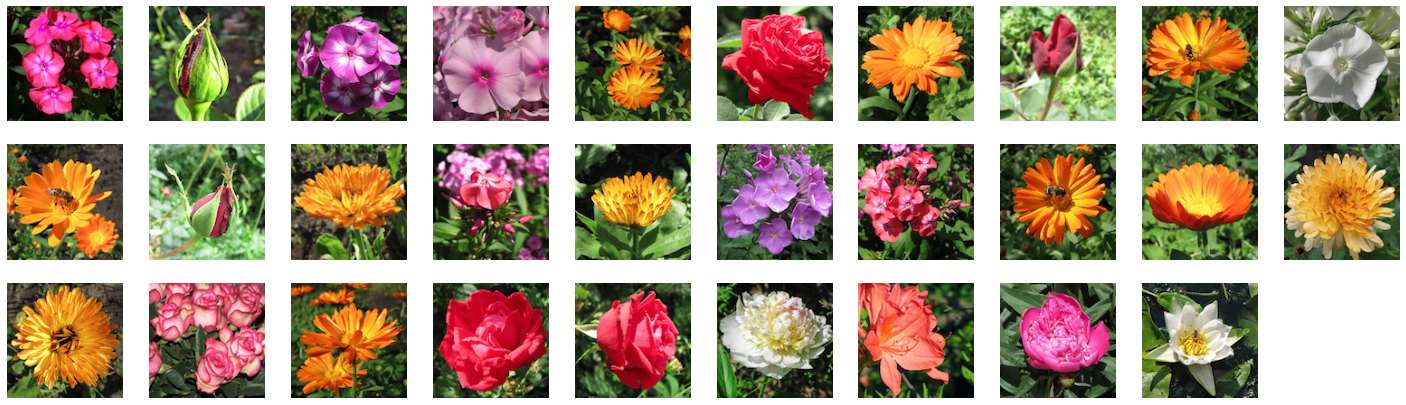

In [ ]:
view_cluster(9)

# Perspectives


*   Test sur le dataset de PMA
*   Utilisation de diffrenetes métrique de mesure (Cosine similarity, etc) 
*   Utilisation d'autre algorithmes de clustering (XGboost,random forest, etc) 
*   Utilisation d'autre Backbone de NN pour l'extraction des features


